# Assesing the difference in health insurance charges between smokers and non smokers in the United States

## Introduction

With only about 8.3 percent of the population not being insured at any point in the past year, health insurance has a widespread impact on the American population (Keisler-Starkey & Bunch, 2022). Many companies will also take insurance premiums out of employees' pay, so it is important for employees to know the actions they can take to reduce them (Fontinelle, 2022). For this reason, we decided to explore if people who smoke are charged more for health insurance than those who do not in the United States, as this is one variable that people can control. Our population of interest is people in the United States with health insurance policies. To answer our inferential question, we will calculate the difference in means between yearly insurance charges of smokers versus non-smokers as our point estimate, using the null hypothesis that there is no difference in charges and the alternative hypothesis that charges are greater for smokers. Our data has been collected from the US Health Insurance Dataset and contains 1338 rows of data described below.

## Preliminary Results

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(datateachr)
library(repr)
library(digest)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Read in dataset
insurance <- read_csv("https://raw.githubusercontent.com/Yuji03b/STAT-201-GROUP-1/main/insurance.csv")

# view first few rows
head(insurance)

Rows: 1338 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (4): age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,bmi,children,smoker,region,charges
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


The columns in the dataset are:
1. `Age`: Age of beneficiary

2. `Sex`: Insurance contractor gender, female / male

3. `bmi`: Body mass index

4. `children`: Number of children covered by health insurance

5. `smoker`: Whether beneficiary is a smoker or not

6. `region`: The beneficiary's residential area in the US

7. `charges`: Individual medical costs billed by health insurance

In [3]:
# Describe columns of interest
summary(insurance |> select(smoker, charges))

    smoker             charges     
 Length:1338        Min.   : 1122  
 Class :character   1st Qu.: 4740  
 Mode  :character   Median : 9382  
                    Mean   :13270  
                    3rd Qu.:16640  
                    Max.   :63770  

Looking at the dataset, we need to make sure that there is an even number of female and male represented in both smoking and non smoking groups, as well as age, bmi, and number of dependents to ensure these variables do not impact our study of the smoker variable.

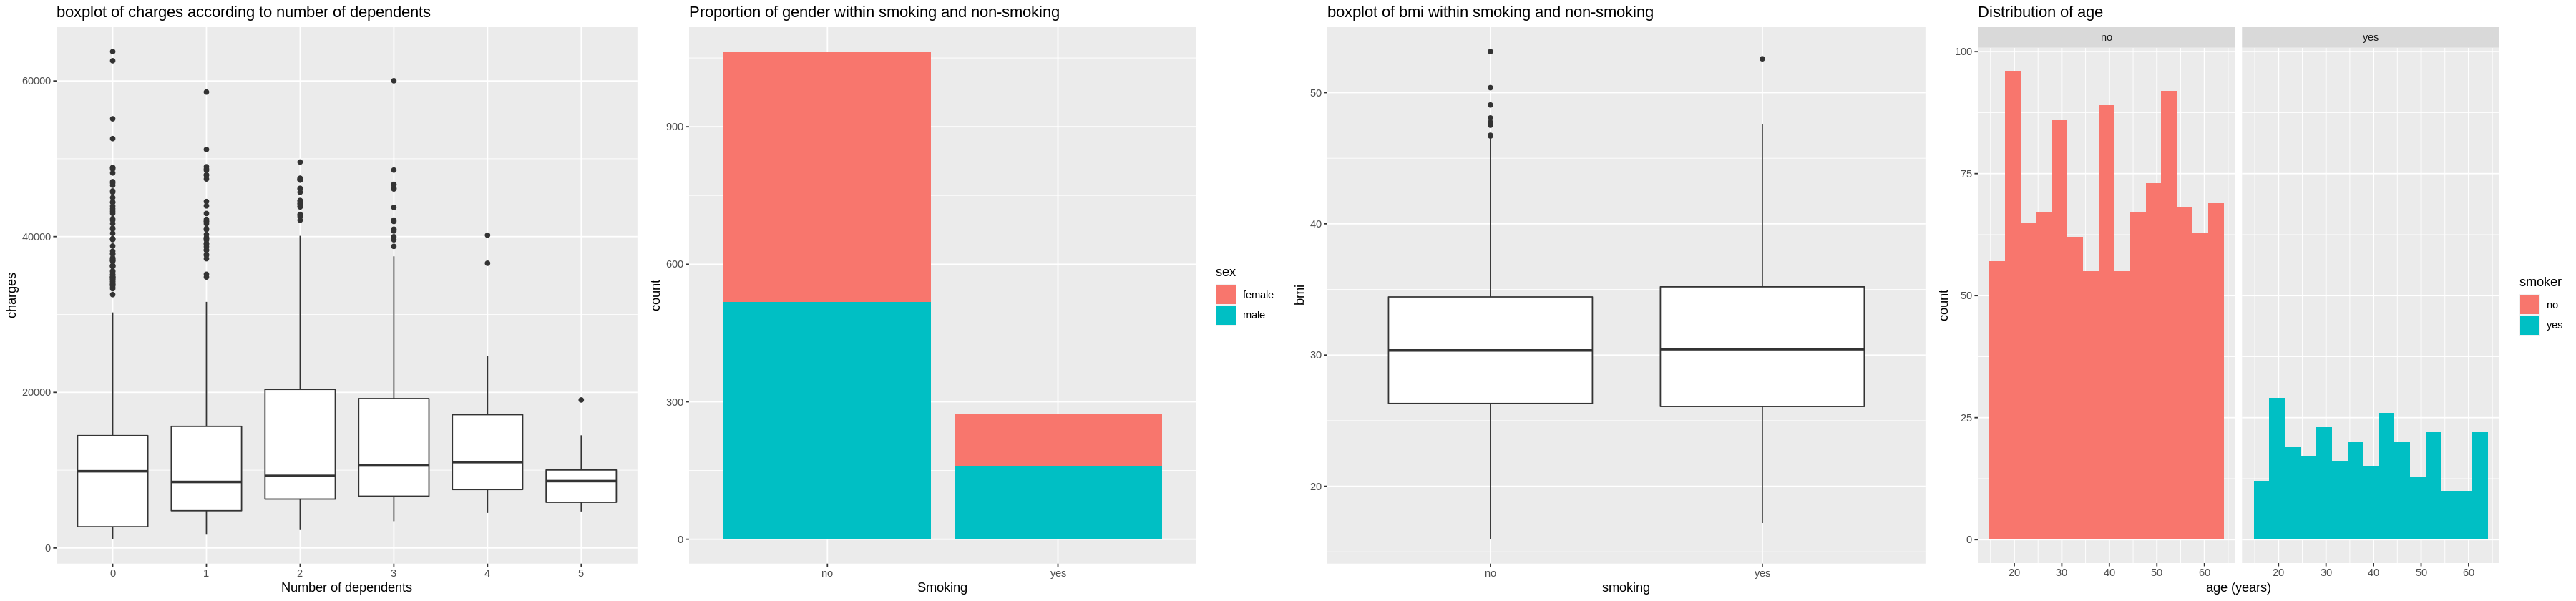

In [4]:
plot1 <- ggplot(insurance, aes(x=as.factor(children), y=charges)) +
    geom_boxplot() +
    ggtitle("boxplot of charges according to number of dependents") +
    xlab("Number of dependents")

# plot proportions of each gender grouped by smoker variable
plot2 <- insurance %>%
    ggplot() +
    geom_bar(aes(x=as.factor(smoker), fill = sex)) +
    ggtitle("Proportion of gender within smoking and non-smoking") +
    xlab("Smoking")

# plot bmi variable grouped by smoker variable
plot3 <- ggplot(insurance, aes(x=as.factor(smoker), y=bmi)) +
    geom_boxplot() +
    ggtitle("boxplot of bmi within smoking and non-smoking") +
    xlab("smoking")

# plot age variable grouped by smoker variable
smoker_age_plot <- insurance %>%
    ggplot(aes(x = age, fill = smoker)) +
    geom_histogram(bins = 15) +
    facet_grid(.~ factor(smoker)) +
    ggtitle("Distribution of age") +
    xlab("age (years)") 
options(repr.plot.width=30, repr.plot.height=7) 
plot_grid(plot1, plot2, plot3, smoker_age_plot, ncol = 4, rel_widths = )

Fortunately, the groups look like they are well represented in the smoking and non-smoking groups.

In [5]:
# calculate point estimates of mean and standard deviation for each group
insurance_estimates <- insurance %>%
    group_by(smoker) %>%
    summarize(mean = mean(charges), sd = sd(charges)) 

insurance_estimates

smoker,mean,sd
<chr>,<dbl>,<dbl>
no,8434.268,5993.782
yes,32050.232,11541.547


Our table above show that non-smoking has a significantly lower mean insurance charge than smoking, hence our alternative hypothesis will be $\mu_{\text{smokers}} - \mu_{\text{non-smokers}}>0$

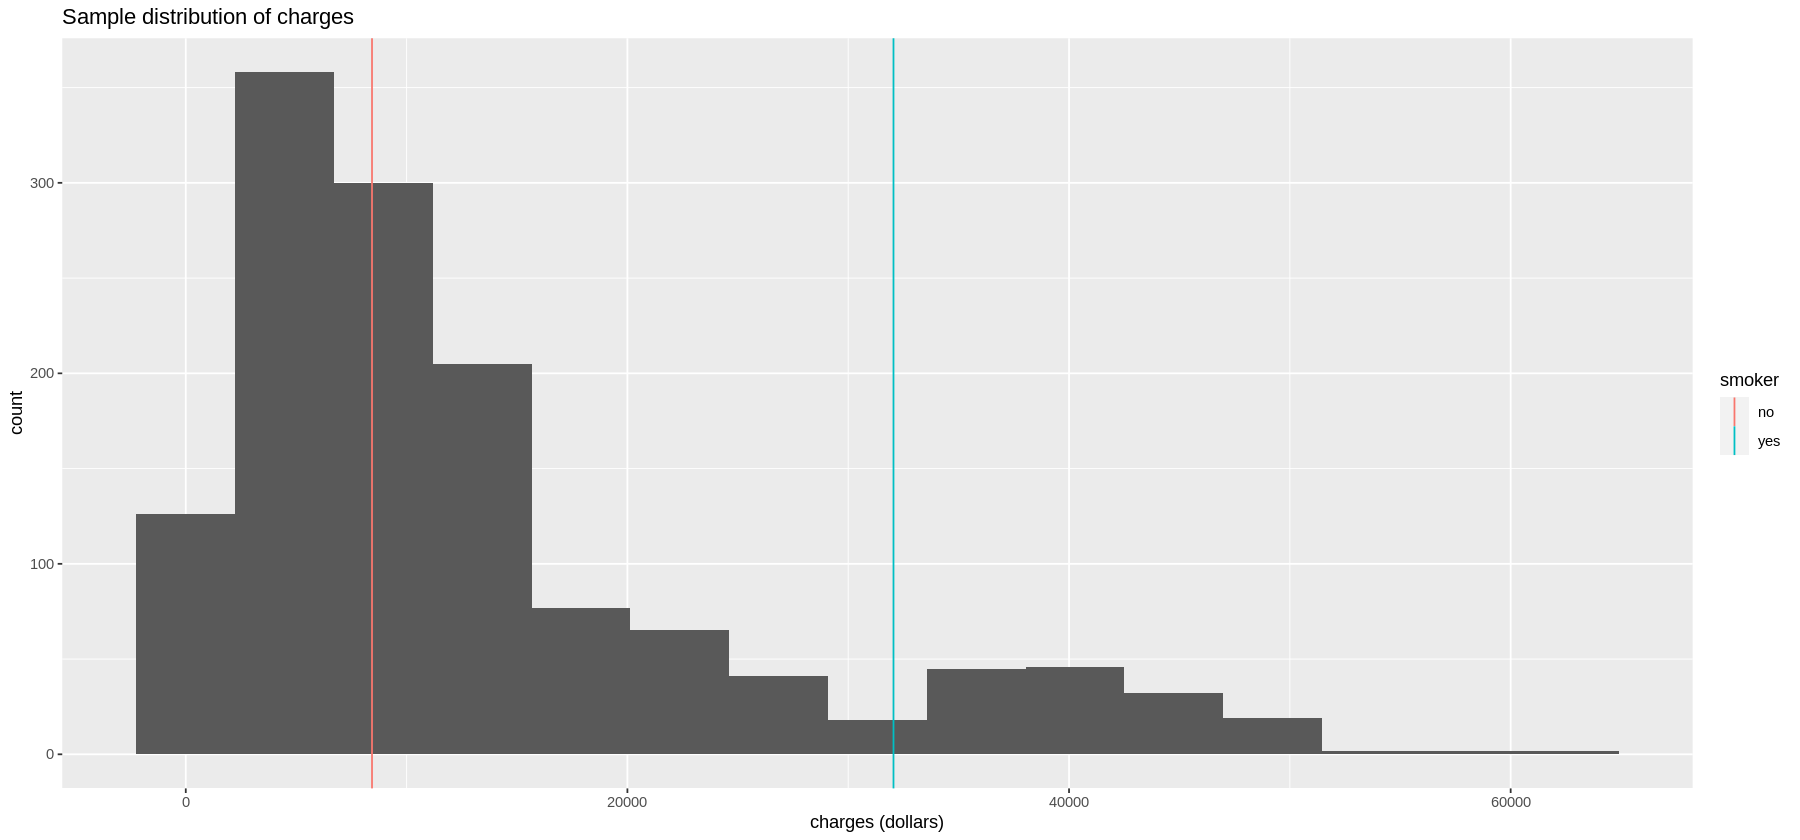

In [6]:
# plot distribution of the sample
options(repr.plot.width=15, repr.plot.height=7) 

plot5 <- insurance %>%
    ggplot(aes(x = charges)) +
    geom_histogram(bins = 15) +
    ggtitle("Sample distribution of charges") +
    xlab("charges (dollars)") +
    geom_vline(data = insurance_estimates, aes(xintercept = mean, color = smoker)) 
plot5

In [7]:
# select smoker and charges columns from our dataset
insurance <- insurance %>%
    select(smoker, charges) %>%
    filter(!is.na(charges))

head(insurance)

smoker,charges
<chr>,<dbl>
yes,16884.924
no,1725.552
no,4449.462
no,21984.471
no,3866.855
no,3756.622


## Methods Plan

To answer the question, we will conduct a hypothesis test using the difference in means between yearly insurance charges of smokers versus non smokers in the United States as our point estimate.


$$H_0: \mu_{\text{smokers}} - \mu_{\text{non-smokers}}=0$$

$$H_1:\mu_{\text{smokers}} - \mu_{\text{non-smokers}}>0$$

Since the smoker and non-smoker groups are independent and the distribution is not normal, we will use the following two-sample t-test;

$$
T = \frac{\bar{x}_{\text{smokers}} - \bar{x}_{\text{non-smokers}}}{\sqrt{\frac{s^2_{\text{smokers}}}{n_1}+\frac{s^2_{\text{non-smokers}}}{n_2}}}
$$

The values of the t statistic are not equal in different samples because of different sample means and sample variances. To make our estimation more precise, we will use the bootstrapping method to simulate the null distribution.

Then we will calculate the p-value, which is the probability of how unusual the data results are if $H_0: \mu_{\text{smokers}} - \mu_{\text{non-smokers}}=0$ is true. By assigning a 5% significant level, the p-value will be compared with the significant level, deciding whether to reject $H_0$.

We will then calculate the 95% confidence interval for our test statistic to get a better sense of the spread of the data.

We will also calculate the probabilities of Type I and Type II Errors and take steps to reduce their likelihood such as using a low significance level and using as large a sample size as we can, and report these probabilities along with the power of our test to comment on the likelihood of these errors.

Through this analysis, We expect to find that the people who smoke are charged more for health insurance than those who do not, which means that we expect to reject $H_0$. This would tell people that they can lower insurance costs based on their smoking habits. This study could also lead to further questions regarding if this analysis applies to other countries with different insurance laws and smoking levels.

While our expected result is to see a correlation between insurance costs and smoking status, there are many other factors impacting that impact these costs. As a result, we must be careful reporting a direct relationship when many other factors could also influence insurance charges, and our relatively small sample size could lead us to report a relationship that only exists for a small part of the population.

## References

Datta, A. (2019) <i>US Health Insurance Dataset</i> [Data set]. Kaggle. https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

Keisler-Starkey, K., & Bunch, L.N. (2022, September 13). <i>Health Insurance Coverage in the United States: 2021</i>. United States Census Bureau.     
    https://www.census.gov/library/publications/2022/demo/p60-278.html#:~:text=Highlights,8.6%20percent%20or%2028.3%20million

Fontinelle, A. (2022, March 2). <i>How Much Does Health Insurance Cost?</i>. Investopedia. 
    https://www.investopedia.com/how-much-does-health-insurance-cost-4774184